# TensorFlores - Example 3

## 1. Importing libraries

In [1]:
import sys, os
path = os.getcwd().split('\\examples')[0]
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflores.utils.clustering import ClusteringMethods
from tensorflores.utils.quantization import Quantization
from tensorflores.utils.cpp_generation import CppGeneration
from tensorflores.utils.json_handle import JsonHandle

## 2.  Create the TensorFlores class

## 3. Load model from json

In [3]:
model_as_json = JsonHandle().load_json_model('./tensorflores_without_quant')
model_as_json

Successfully loaded JSON file: ./tensorflores_without_quant.json


{'model_quantized': False,
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[-0.0005772341026594916,
     -0.5119157914591745,
     -1.3189779787766966,
     -1.9037018013659437,
     1.1653238877453183,
     0.6979194232837418,
     -0.4947619250545843,
     0.5596694645277294,
     0.017927842179126293,
     0.4258959180168385,
     -0.7844215229879007,
     -0.6032661853253871,
     1.0562813891255107,
     -0.9984179598545366,
     -0.4751303435229142,
     0.30954778709071823],
    [-1.8279283822629908,
     -0.8736809736211831,
     0.26488414978405633,
     -0.18527473295441668,
     -0.28297667843023394,
     0.30667821875944506,
     1.7694933626794898,
     1.917080727870769,
     0.04506059801060034,
     -0.5984374585251195,
     0.9413366064050688,
     -1.5926025821478966,
     0.9144431819871668,
     0.49239482384405703,
     -0.893092057504579,
     -0.012206797064560581],
    [0.7425815991919884,
     -1.6716265349098656,
     1.149758634153701,
   

## 4. Post-Training Quantization

### 4.1 Evolving post-training quantization

#### 4.1.1 Choose the quantization method

- Autocloud 
    - bias_clustering_method = Clustering_method.autocloud_biases(threshold_biases = 1.4148)
    - weight_clustering_method = Clustering_method.autocloud_weight(threshold_weights = 1.4148)

- Meanshift
    - weight_clustering_method = Clustering_method.meanshift_weight(bandwidth_weights = 0.005)
    - bias_clustering_method = Clustering_method.meanshift_biases(bandwidth_biases = 0.005)

- Affinity Propagation
    - weight_clustering_method = Clustering_method.affinity_propagation_weight(affinityprop_damping_bias = 0.65)
    - bias_clustering_method = Clustering_method.affinity_propagation_biases(affinityprop_damping_weight = 0.7)

- DBSTREAM
    - weight_clustering_method = Clustering_method.dbstream_weight(clustering_threshold_bias = 0.8)
    - bias_clustering_method = Clustering_method.dbstream_biases(clustering_threshold_weight = 0.1)

In [4]:
Clustering_method = ClusteringMethods()

bias_clustering_method = Clustering_method.autocloud_biases(threshold_biases = 1.4)
weight_clustering_method = Clustering_method.autocloud_weight(threshold_weights = 1.4)

#### 4.1.2 Define the metric to calculate the distance between the centroids of the clusters and the values of weights and/or biases

- "euclidean"
- "manhattan"
- "minkowski"
- "chebyshev"
- "cosine"
- "hamming"
- "bray_curtis"
- "jaccard"
- "wasserstein"
- "dtw"

In [5]:
model_as_json_quant = Quantization().post_training_quantization(json_data = model_as_json,
                                        quantization_type = 'evolving', 
                                        distance_metric = "dtw", 
                                        bias_clustering_method = bias_clustering_method,
                                        weight_clustering_method = weight_clustering_method)

In [6]:
model_as_json_quant

{'model_quantized': 'evolving',
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[17, 133, 1, 2, 3, 4, 137, 5, 17, 6, 7, 134, 8, 9, 139, 10],
    [11, 12, 13, 0, 0, 14, 15, 16, 17, 135, 18, 19, 20, 21, 22, 17],
    [23, 24, 25, 26, 27, 28, 0, 29, 30, 31, 32, 33, 34, 35, 36, 17]],
   'biases': [7, 8, 1, 2, 1, 1, 1, 0, 0, 3, 4, 1, 9, 1, 5, 0]},
  {'activation': 'relu',
   'weights': [[37, 0, 35, 38, 39, 40, 41, 42],
    [0, 0, 43, 44, 45, 0, 46, 47],
    [140, 48, 49, 50, 51, 52, 53, 54],
    [141, 55, 56, 57, 58, 59, 17, 60],
    [61, 62, 63, 64, 65, 66, 67, 68],
    [0, 69, 136, 70, 0, 71, 72, 142],
    [143, 17, 58, 61, 73, 74, 75, 0],
    [76, 77, 78, 138, 79, 80, 17, 81],
    [143, 82, 69, 83, 0, 84, 85, 17],
    [86, 87, 142, 88, 89, 90, 91, 92],
    [93, 94, 0, 143, 140, 36, 143, 95],
    [96, 97, 98, 0, 99, 100, 101, 102],
    [98, 103, 104, 0, 0, 105, 106, 107],
    [108, 109, 75, 55, 110, 111, 112, 113],
    [17, 114, 115, 116, 117, 118, 119, 17],
    [143, 1

#### 4.1.3 Save model as C++

In [7]:
cpp_model = CppGeneration().generate_cpp_from_json(json_data = model_as_json_quant, file_name = 'tensorflores_evolving_PQT')
cpp_model

Model C++ saved!


'namespace Conect2AI {\nnamespace TensorFlores {\nclass MultilayerPerceptron {\npublic: \n\nfloat* predict(float *x) {\n    float* y_pred = new float[1];\nstatic const float center_bias[10] = {0.00010215985826635605, 0.006732687490594896, -0.02950002537188572, 0.017582526832766652, 0.010890416086632179, -0.026729979457111197, -0.01844053522569908, -0.014468796308583772, -0.007894700256005908, -0.0037439937749622256};\n\nstatic const float centers_weights[144] = {-0.16472166540057215, -1.3189779787766966, -1.903701801365944, 1.1653238877453183, 0.6979194232837418, 0.5596694645277294, 0.4258959180168385, -0.7844215229879007, 1.0562813891255107, -0.9984179598545366, 0.30954778709071823, -1.8279283822629906, -0.873680973621183, 0.2648841497840563, 0.3066782187594451, 1.76949336267949, 1.9170807278707689, 0.04506059801060035, 0.9413366064050688, -1.5926025821478966, 0.9144431819871668, 0.4923948238440571, -0.8930920575045789, 0.7425815991919884, -1.6716265349098656, 1.1497586341537007, 0.75

### 4.2 Int8 post-training quantization

#### 4.2.1 Apply int8 quantizaion

In [8]:
model_as_json_int8 = Quantization().post_training_quantization(json_data = model_as_json,
                                        quantization_type = 'int8')

#### 4.2.2 Save model as C++

In [9]:
model_as_json_int8

{'model_quantized': 'int8',
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[118,
     98,
     66,
     43,
     165,
     146,
     99,
     141,
     119,
     135,
     87,
     94,
     161,
     79,
     100,
     131],
    [46,
     84,
     129,
     111,
     107,
     131,
     189,
     195,
     120,
     95,
     156,
     55,
     155,
     138,
     83,
     118],
    [148,
     52,
     164,
     149,
     139,
     156,
     113,
     155,
     78,
     159,
     50,
     46,
     146,
     127,
     139,
     118]],
   'biases': [118,
    118,
    119,
    117,
    119,
    119,
    119,
    119,
    119,
    119,
    119,
    119,
    118,
    119,
    117,
    119]},
  {'activation': 'relu',
   'weights': [[158, 110, 127, 130, 19, 166, 140, 154],
    [115, 115, 129, 89, 152, 114, 187, 168],
    [100, 133, 143, 92, 65, 141, 46, 71],
    [101, 131, 47, 141, 133, 182, 119, 131],
    [166, 135, 155, 132, 136, 231, 130, 159],
    [113, 147, 97, 142, 1

In [10]:
cpp_model_int8 = CppGeneration().generate_cpp_from_json(json_data = model_as_json_int8, file_name = 'tensorflores_int8_PQT')

Model C++ saved!


In [11]:
df = pd.read_csv('./result/output_PQT_int8.csv', sep=';')

In [12]:
error = df['Predicted'].values - df['Real'].values 

In [13]:
df['Time (us)'].values[1:].mean()

776.9075794621027

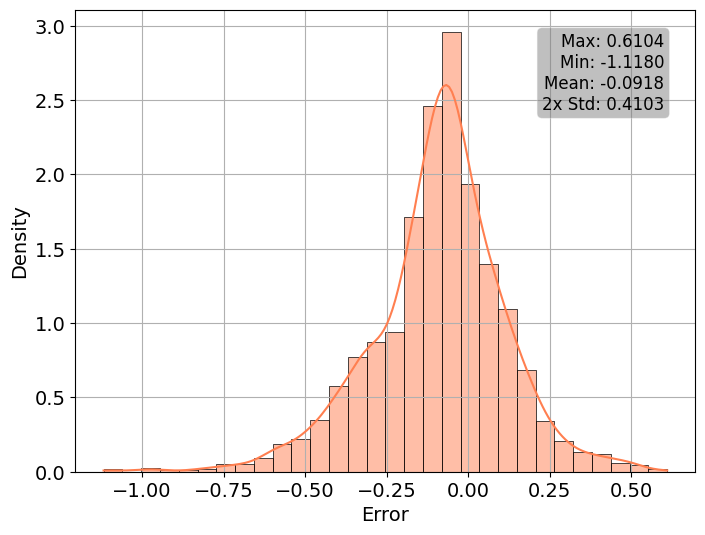

In [14]:
# Estatísticas
error_mean = np.mean(error)
error_std = np.std(error)
error_max = np.max(error)
error_min = np.min(error)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Estilo do gráfico
plt.style.use('ggplot')

# Plotando histograma com KDE (Densidade) sem legenda
sns.histplot(error, bins=30, color='coral', edgecolor='black', stat="density", kde=True, legend=False, ax=ax)

# Configuração dos eixos
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.set_title('Error Distribution', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)

# Definindo limites do eixo X
#ax.set_xlim(error_min, error_max)

# Exibir os valores estatísticos no gráfico
textstr = '\n'.join((
    f'Max: {error_max:.4f}',
    f'Min: {error_min:.4f}',
    f'Mean: {error_mean:.4f}',
    f'2x Std: {2 * error_std:.4f}'
))
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.savefig('./figures/example_04_float32.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# Exibir gráfico
plt.show()

In [15]:
df = pd.read_csv('./result/output_PQT_evolving.csv', sep=';')

In [16]:
error = df['Predicted'].values - df['Real'].values 

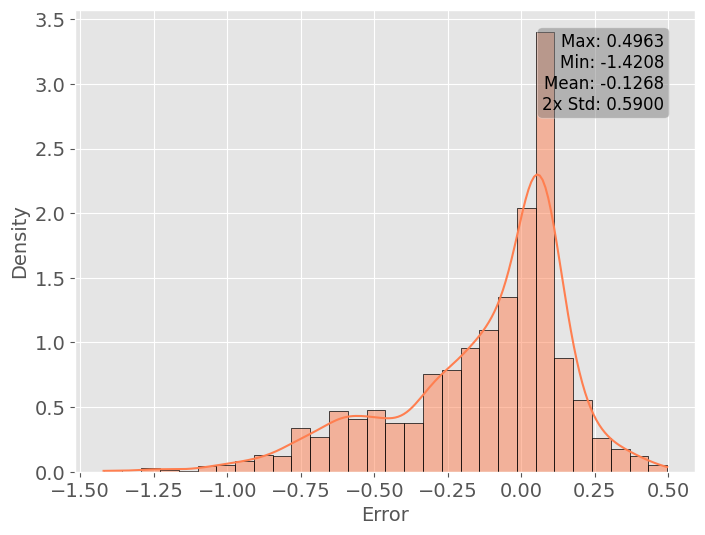

In [17]:
# Estatísticas
error_mean = np.mean(error)
error_std = np.std(error)
error_max = np.max(error)
error_min = np.min(error)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Estilo do gráfico
plt.style.use('ggplot')

# Plotando histograma com KDE (Densidade) sem legenda
sns.histplot(error, bins=30, color='coral', edgecolor='black', stat="density", kde=True, legend=False, ax=ax)

# Configuração dos eixos
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.set_title('Error Distribution', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)

# Definindo limites do eixo X
#ax.set_xlim(error_min, error_max)

# Exibir os valores estatísticos no gráfico
textstr = '\n'.join((
    f'Max: {error_max:.4f}',
    f'Min: {error_min:.4f}',
    f'Mean: {error_mean:.4f}',
    f'2x Std: {2 * error_std:.4f}'
))
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.savefig('./figures/example_03_evolving.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# Exibir gráfico
plt.show()